In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import gmaps

In [2]:
accident=pd.read_csv("cal.csv")
accident

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition
0,728,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear
1,729,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear
2,730,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear
3,731,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear
4,732,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...
663199,2974330,2,2019-08-23 18:03:25,34.002480,-117.379360,Pomona Fwy E,Riverside,Riverside,CA,92501,86.0,Fair
663200,2974331,2,2019-08-23 19:11:30,32.766960,-117.148060,I-8 W,San Diego,San Diego,CA,92108,70.0,Fair
663201,2974332,2,2019-08-23 19:00:21,33.775450,-117.847790,Garden Grove Fwy,Orange,Orange,CA,92866,73.0,Partly Cloudy
663202,2974333,2,2019-08-23 19:00:21,33.992460,-118.403020,San Diego Fwy S,Culver City,Los Angeles,CA,90230,71.0,Fair


In [3]:
accident.columns

Index(['Unnamed: 0', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Temperature(F)',
       'Weather_Condition'],
      dtype='object')

In [4]:
cleaned_accident = accident[["Severity", "Start_Time", "Start_Lat", "Start_Lng", "Street",
                           "City", "County", "State", "Zipcode", "Temperature(F)", 
                           "Weather_Condition",]]

In [5]:
cleaned_accident.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition
0,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear
1,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear
2,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear
3,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear
4,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear


In [6]:
cal = cleaned_accident[cleaned_accident.State == 'CA']

In [7]:
county_count = cal.groupby('County').count()

In [34]:
county_count

,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,State,Zipcode,Temperature(F),Weather_Condition
County,,,,,,,,,,
Alameda,45367,45367,45367,45367,45367,45367,45367,45367,44689,44950
Alpine,60,60,60,60,60,60,60,60,59,59
Amador,758,758,758,758,758,758,758,758,683,673
Butte,1413,1413,1413,1413,1413,1413,1413,1413,1389,1395
Calaveras,927,927,927,927,927,927,927,927,807,803
Colusa,375,375,375,375,375,375,375,375,374,371
Contra Costa,23059,23059,23059,23059,23059,23059,23059,22998,22900,22906
Del Norte,192,192,192,192,192,192,192,192,189,190
El Dorado,3030,3030,3030,3030,3030,3030,3030,3028,2839,2820


In [9]:
city_count = cal.groupby('City').count()

In [10]:
city_count

,Severity,Start_Time,Start_Lat,Start_Lng,Street,County,State,Zipcode,Temperature(F),Weather_Condition
City,,,,,,,,,,
Acampo,398,398,398,398,398,398,398,398,397,397
Acton,1298,1298,1298,1298,1298,1298,1298,1298,1297,1297
Adelanto,60,60,60,60,60,60,60,60,19,57
Adin,1,1,1,1,1,1,1,1,1,1
Agoura Hills,656,656,656,656,656,656,656,656,655,655
...,...,...,...,...,...,...,...,...,...,...
Yuba City,233,233,233,233,233,233,233,233,232,231
Yucaipa,141,141,141,141,141,141,141,141,141,141
Yucca Valley,38,38,38,38,38,38,38,38,38,38


In [11]:
cal.Start_Time.array[0]

'2016-06-21 10:34:40'

## Nice to know

What month are people in more accidents?
(12 month bar graph)

In [12]:
cleaned_accident["Month"]=""
cleaned_accident["Month"]=cleaned_accident["Start_Time"].str.slice(5,7,1)
cleaned_accident




,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition,Month
0,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear,06
1,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear,06
2,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear,06
3,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear,06
4,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear,06
...,...,...,...,...,...,...,...,...,...,...,...,...
663199,2,2019-08-23 18:03:25,34.002480,-117.379360,Pomona Fwy E,Riverside,Riverside,CA,92501,86.0,Fair,08
663200,2,2019-08-23 19:11:30,32.766960,-117.148060,I-8 W,San Diego,San Diego,CA,92108,70.0,Fair,08
663201,2,2019-08-23 19:00:21,33.775450,-117.847790,Garden Grove Fwy,Orange,Orange,CA,92866,73.0,Partly Cloudy,08
663202,2,2019-08-23 19:00:21,33.992460,-118.403020,San Diego Fwy S,Culver City,Los Angeles,CA,90230,71.0,Fair,08


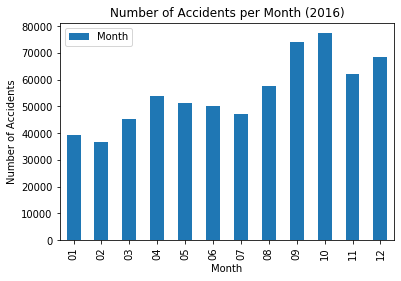

In [33]:
accident_months=cleaned_accident['Month'].value_counts()
months_df=pd.DataFrame(accident_months)
months_df=months_df.sort_index()


months_bar=months_df.plot.bar()


plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per Month (2016)")

plt.show()

Average accident severity of each county (dataframe)

In [15]:
county_severity=county_count.groupby('County').mean()["Severity"]
county_severity

county_severity_df= pd.DataFrame({"Average Severity":county_severity})
county_severity_df.head()


,Average Severity
County,
Alameda,45367
Alpine,60
Amador,758
Butte,1413
Calaveras,927


Most common time of day for accidents (line graph/scatter plot)

## Danger

most dangerous highway (avg severity and count of accidents)

most dangerous county (avg severity and count of accidents)

## Counties and Cities

California counties by number of accidents (normalize by population)

Top 5 cities that have the most accidents

State heatmap with markers 

## Weather

Correlation between weather conditions and accidents (linear regression)

Weather to severity correlation (linear regression)

Most common weather conditions during accident (bar graph)